In [380]:
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.pyplot as plt
import plotly.express as px

In [401]:
import pandas as pd
import numpy as np


data=pd.read_csv("E:/user/Notebooks/data/2015.csv")
data2015= pd.read_csv("E:/user/Notebooks/data/2015.csv")
data2016= pd.read_csv("E:/user/Notebooks/data/2016.csv")
data2018= pd.read_csv("E:/user/Notebooks/data/2018.csv")
data2017= pd.read_csv("E:/user/Notebooks/data/2017.csv")
data2019= pd.read_csv("E:/user/Notebooks/data/2019.csv")
data2020 = pd.read_csv("E:/user/Notebooks/data/2020.csv")

In [382]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


There are diffrences in datas. Some features missing or there are some features named different words.

In [383]:
data2015=data2015.drop(['Happiness Rank','Region','Standard Error'], axis=1)
data2016=data2016.drop(['Happiness Rank','Region','Lower Confidence Interval','Upper Confidence Interval'], axis=1)
data2017=data2017.drop(['Happiness.Rank','Whisker.high','Whisker.low'], axis=1)
data2018=data2018.drop(['Overall rank'], axis=1)
data2019=data2019.drop(['Overall rank'], axis=1)
data2020=data2020.drop(['Healthy life expectancy','Regional indicator','Standard error of ladder score','upperwhisker','lowerwhisker','Ladder score in Dystopia','Logged GDP per capita','Perceptions of corruption','Ladder score in Dystopia','Explained by: Social support','Generosity','Freedom to make life choices'], axis=1)

dropped out different features in data.

In [384]:

data2015 = data2015.rename(columns = {'Economy (GDP per Capita)':'GDP_per_capita','Happiness Score':'Happiness_Score','Health (Life Expectancy)':'Health_(Life_Expectancy)'}, inplace = False)
data2016 = data2016.rename(columns = {'Economy (GDP per Capita)':'GDP_per_capita','Happiness Score':'Happiness_Score','Health (Life Expectancy)':'Health_(Life_Expectancy)'}, inplace = False)
data2017 = data2017.rename(columns = { 'Happiness.Score':'Happiness_Score','Economy..GDP.per.Capita.': 'GDP_per_capita','Health..Life.Expectancy.':'Health_(Life_Expectancy)','Trust..Government.Corruption.':'Trust (Government Corruption)','Dystopia.Residual':'Dystopia Residual'}, inplace = False)
data2018 = data2018.rename(columns = {'GDP per capita':'GDP_per_capita','Freedom to make life choices': 'Freedom','Country or region':'Country','Score':'Happiness_Score','Healthy life expectancy':'Health_(Life_Expectancy)','Perceptions of corruption':'Trust (Government Corruption)'}, inplace = False)
data2019 = data2019.rename(columns = {'GDP per capita':'GDP_per_capita','Freedom to make life choices': 'Freedom','Country or region':'Country','Score':'Happiness_Score','Healthy life expectancy':'Health_(Life_Expectancy)','Perceptions of corruption':'Trust (Government Corruption)'}, inplace = False)
data2020 = data2020.rename(columns = {'Country name':'Country','Explained by: Log GDP per capita':'GDP_per_capita','Ladder score':'Happiness_Score','Explained by: Healthy life expectancy':'Health_(Life_Expectancy)','Explained by: Freedom to make life choices':'Freedom','Explained by: Generosity':'Generosity','Explained by: Perceptions of corruption':'Trust (Government Corruption)','Dystopia + residual':'Dystopia Residual'}, inplace = False)

Renamed features that have different names.

**Features of datas**

In [385]:
data2015.head(1)

,Country,Happiness_Score,GDP_per_capita,Family,Health_(Life_Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,7.587000000000001,1.396510000000000,1.349510000000000,0.941430000000000,0.665570000000000,0.419780000000000,0.296780000000000,2.517380000000000


In [386]:
data2016.head(1)

,Country,Happiness_Score,GDP_per_capita,Family,Health_(Life_Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,7.526000000000000,1.441780000000000,1.163740000000000,0.795040000000000,0.579410000000000,0.444530000000000,0.361710000000000,2.739390000000000


In [387]:
data2017.head(1)

,Country,Happiness_Score,GDP_per_capita,Family,Health_(Life_Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,Norway,7.537000179290769,1.616463184356690,1.533523559570310,0.796666502952576,0.635422587394714,0.362012237310410,0.315963834524155,2.277026653289790


In [388]:
data2018.head(1)

,Country,Happiness_Score,GDP_per_capita,Social support,Health_(Life_Expectancy),Freedom,Generosity,Trust (Government Corruption)
0,Finland,7.632000000000001,1.305000000000000,1.592000000000000,0.874000000000000,0.681000000000000,0.202000000000000,0.393000000000000


In [389]:
data2019.head(1)

,Country,Happiness_Score,GDP_per_capita,Social support,Health_(Life_Expectancy),Freedom,Generosity,Trust (Government Corruption)
0,Finland,7.769000000000000,1.340000000000000,1.587000000000000,0.986000000000000,0.596000000000000,0.153000000000000,0.393000000000000


In [390]:
data2020.head(1)

,Country,Happiness_Score,Social support,GDP_per_capita,Health_(Life_Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,Finland,7.808700085000000,0.954329729000000,1.285189509000000,0.961271405000000,0.662316740000000,0.159670442000000,0.477857262000000,2.762835026000000


added new year column in datas

In [391]:
data2015['Year']=2015
data2016['Year']=2016
data2017['Year']=2017
data2018['Year']=2018
data2019['Year']=2019
data2020['Year']=2020

In [392]:
hp=pd.concat([data2015,data2016,data2017,data2018,data2019,data2020], ignore_index=True, sort=False)

In [394]:
hp.isnull().sum()*100/len(hp)   

Country                          0.000000000000000
Happiness_Score                  0.000000000000000
GDP_per_capita                   0.000000000000000
Family                          49.732620320855617
Health_(Life_Expectancy)         0.000000000000000
Freedom                          0.000000000000000
Trust (Government Corruption)    0.106951871657754
Generosity                       0.000000000000000
Dystopia Residual               33.368983957219250
Year                             0.000000000000000
Social support                  50.267379679144383
dtype: float64

In [395]:
hp=hp.drop(['Family','Social support'], axis=1)

In [396]:
hp["Dystopia Residual"].fillna(hp["Dystopia Residual"].mean(), inplace=True)


In [397]:
hp['Trust (Government Corruption)'].fillna(hp["Trust (Government Corruption)"].mean(), inplace=True)

In [398]:
hp.head()

,Country,Happiness_Score,GDP_per_capita,Health_(Life_Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,7.587000000000001,1.396510000000000,0.941430000000000,0.665570000000000,0.419780000000000,0.296780000000000,2.517380000000000,2015
1,Iceland,7.561000000000000,1.302320000000000,0.947840000000000,0.628770000000000,0.141450000000000,0.436300000000000,2.702010000000000,2015
2,Denmark,7.527000000000000,1.325480000000000,0.874640000000000,0.649380000000000,0.483570000000000,0.341390000000000,2.492040000000000,2015
3,Norway,7.522000000000000,1.459000000000000,0.885210000000000,0.669730000000000,0.365030000000000,0.346990000000000,2.465310000000000,2015
4,Canada,7.427000000000000,1.326290000000000,0.905630000000000,0.632970000000000,0.329570000000000,0.458110000000000,2.451760000000000,2015


In [399]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        935 non-null    object 
 1   Happiness_Score                935 non-null    float64
 2   GDP_per_capita                 935 non-null    float64
 3   Health_(Life_Expectancy)       935 non-null    float64
 4   Freedom                        935 non-null    float64
 5   Trust (Government Corruption)  935 non-null    float64
 6   Generosity                     935 non-null    float64
 7   Dystopia Residual              935 non-null    float64
 8   Year                           935 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 65.9+ KB


In [400]:
hp.describe()

,Happiness_Score,GDP_per_capita,Health_(Life_Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
count,935.000000000000000,935.000000000000000,935.000000000000000,935.000000000000000,935.000000000000000,935.000000000000000,935.000000000000000,935.000000000000000
mean,5.394436041883377,0.908311353305546,0.625580694495091,0.419680459640696,0.126300849991404,0.213797495403817,2.063148128808934,2017.485561497326216
std,1.124934695131019,0.402023257343241,0.250900290183281,0.152199321325117,0.106940781054337,0.119451549315952,0.462846069678011,1.708260281926376
min,2.566900015000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.257240534000000,2015.000000000000000
25%,4.539999961853030,0.600264340593796,0.449595883011818,0.317835000000000,0.054696711000000,0.127030000000000,1.888574838500000,2016.000000000000000
50%,5.353499889000000,0.974380000000000,0.667464673519135,0.436000000000000,0.092700000000000,0.199358255000000,2.063148128808920,2017.000000000000000
75%,6.198499999999999,1.228785000000000,0.814710000000000,0.539885361194611,0.157730000000000,0.271397605535584,2.232770000000000,2019.000000000000000
max,7.808700085000000,2.096000000000000,1.141000000000000,0.724000000000000,0.551910000000000,0.838075160980225,3.837720000000000,2020.000000000000000


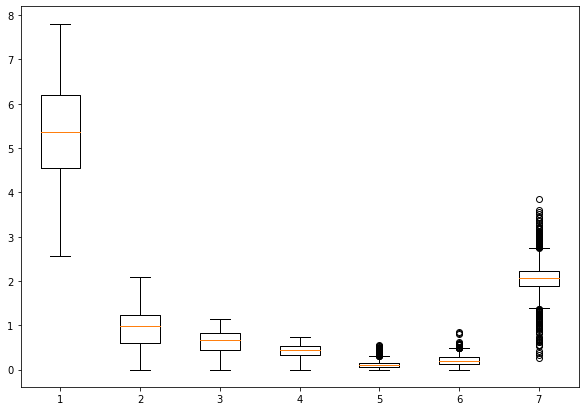

In [352]:
plt.figure(figsize = (10,7))
plt.boxplot([hp['Happiness_Score'], hp['GDP_per_capita'],hp['Health_(Life_Expectancy)'],hp['Freedom'],hp['Trust (Government Corruption)'],hp['Generosity'],hp['Dystopia Residual']])

plt.show();

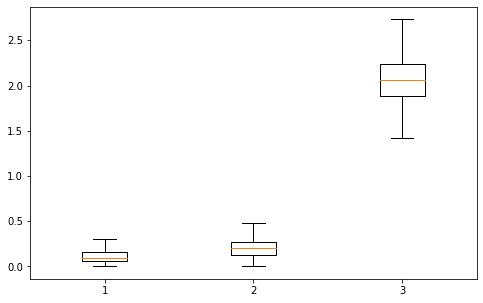

In [353]:
from scipy.stats.mstats import winsorize
plt.figure(figsize = (8,5))
hp['Trust (Government Corruption)']=winsorize(np.array(hp['Trust (Government Corruption)'].dropna()), (0, 0.09))
hp['Generosity']=winsorize(np.array(hp['Generosity'].dropna()), (0, 0.03))
hp['Dystopia Residual']=winsorize(np.array(hp['Dystopia Residual'].dropna()), (0.07, 0.08))
plt.boxplot([hp['Trust (Government Corruption)'],hp['Generosity'],hp['Dystopia Residual']]);

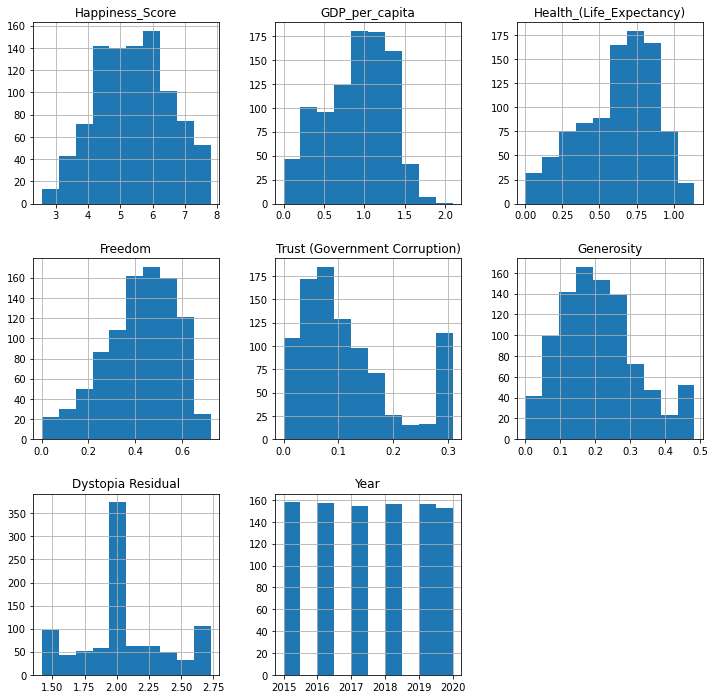

In [354]:
plt.rcParams['figure.figsize']=(12,12)
hp.hist();

**Correlation Matrix**

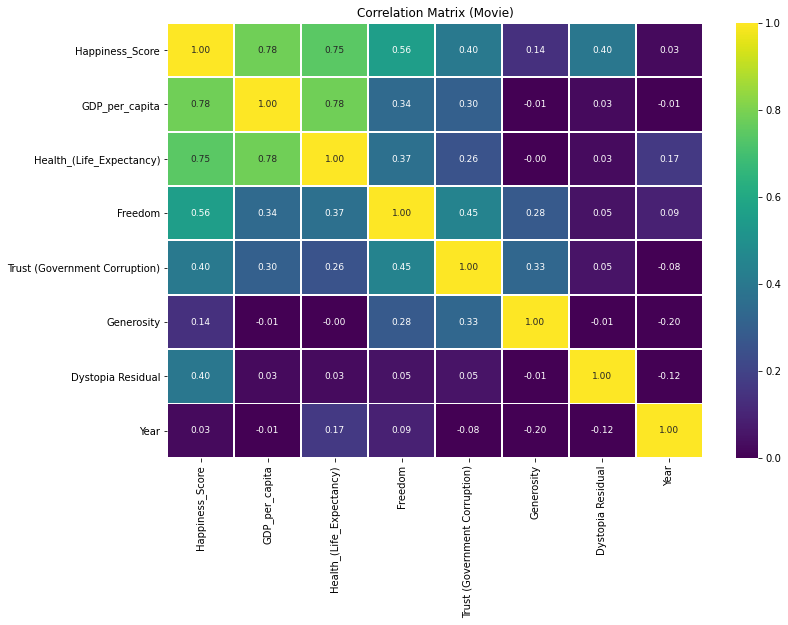

In [355]:
import seaborn as sns
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }

plt.figure(figsize=(12,8))
hp_corr=hp.corr()
sns.heatmap(hp_corr, annot=True, fmt='.2f', annot_kws={"size": 9}, linewidths=.8, vmin=0, vmax=1, cmap='viridis')
plt.title("Correlation Matrix (Movie)")

plt.show()

Happiness score are very related positively with GDP,Health. Health and GDP related each other too as you see in scatter at below

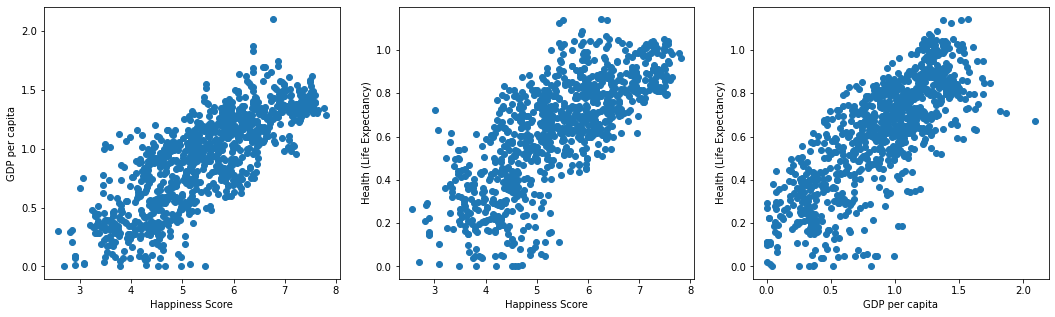

In [140]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(hp["Happiness_Score"], hp["GDP_per_capita"])
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')

plt.subplot(1,3,2)
plt.scatter(hp["Happiness_Score"], hp["Health_(Life_Expectancy)"])
plt.xlabel('Happiness Score')
plt.ylabel('Health (Life Expectancy)')

plt.subplot(1,3,3)
plt.scatter(hp["GDP_per_capita"], hp["Health_(Life_Expectancy)"])
plt.ylabel('Health (Life Expectancy)')
plt.xlabel('GDP per capita')

plt.show()

**Which countries in top 20 about happiness** 

In [141]:
country_group=hp.groupby(by=["Country"]).mean()

In [408]:
country_group=country_group.sort_values(by=['Happiness_Score'], ascending=False)
country_group_20=country_group.sort_values(by=['Happiness_Score'], ascending=False).head(20)


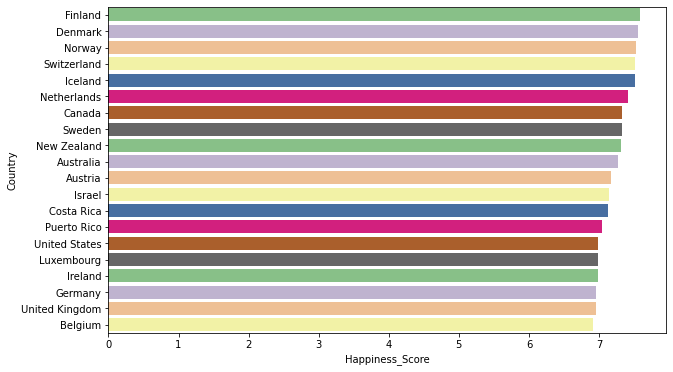

In [169]:
plt.figure(figsize=(10,6))
 
sns.barplot( country_group_20["Happiness_Score"],country_group_20.index,data=country_group_20, palette='Accent');

Finland is most happy country in the world

**Changes of happiness at countries by years**

In [31]:
import seaborn as sns
import plotly.express as px

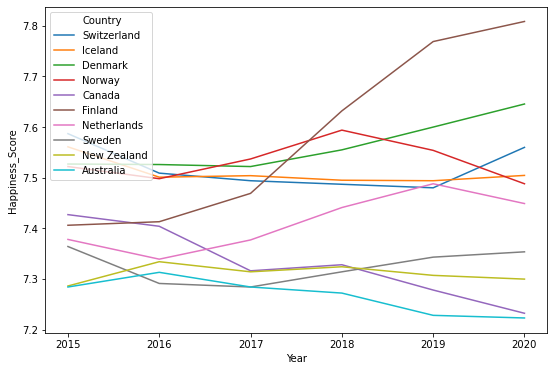

In [32]:

gdp_5 = hp[hp.Country.isin(['Finland', 'Denmark', 'Norway', 'Switzerland', 'Iceland','Netherlands','Canada','Sweden','New Zealand','Australia'])]

plt.figure(figsize=(9, 6))
sns.lineplot(x = 'Year', y = 'Happiness_Score', data = gdp_5, hue = 'Country')
plt.show()

Happiness of Finland increased extremely and last 3 years Finland is most happinest country

**Happiness Score of regions**

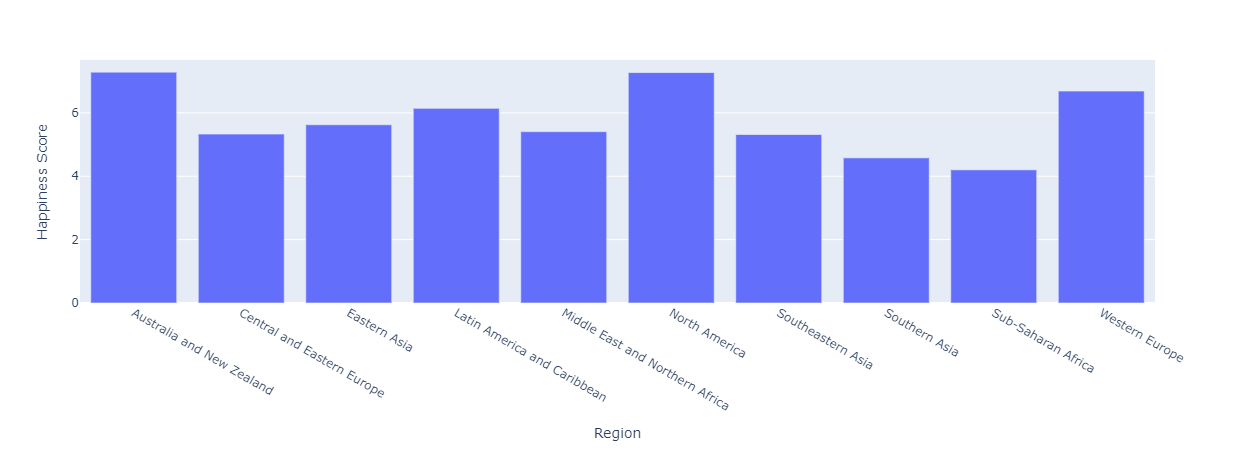

<Figure size 432x216 with 0 Axes>

In [405]:
region=data.groupby(by=["Region"]).mean()

plt.figure(figsize=(6, 3))  
fig = px.bar(data_frame=region, 
             x=region.index, y=region['Happiness Score'])
fig.show();

In [404]:
import scipy.stats as stats
regions = data["Region"].unique()

pd.options.display.float_format = '{:.15f}'.format
for var in ["Happiness Score"]:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("For the sake of comparison {}".format(var),end='')
    for i in range(0, 2):
        for j in range(i+1, 4):
            ttest = stats.ttest_ind(data[data["Region"]==regions[i]][var], data[data["Region"]==regions[j]][var])
            group_1 = regions[i]
            group_2 = regions[j]
            statistic = ttest[0]
            p_value = ttest[1]
            
            comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
    display(comparison)

For the sake of comparison Happiness Score

,group_1,group_2,statistic,p_value
0,Western Europe,North America,-0.977952561933302,0.339230224378366
1,Western Europe,Australia and New Zealand,-0.999807834235332,0.328785518051396
2,Western Europe,Middle East and Northern Africa,4.235262144564106,0.000134671284488
3,North America,Australia and New Zealand,-0.077920435157412,0.944985375245269
4,North America,Middle East and Northern Africa,2.341571390501770,0.029668407994377


t-test results indicate that means of happiness are different as  between Western Europe Middle East and Northern Africa

**Most happy countries by years**

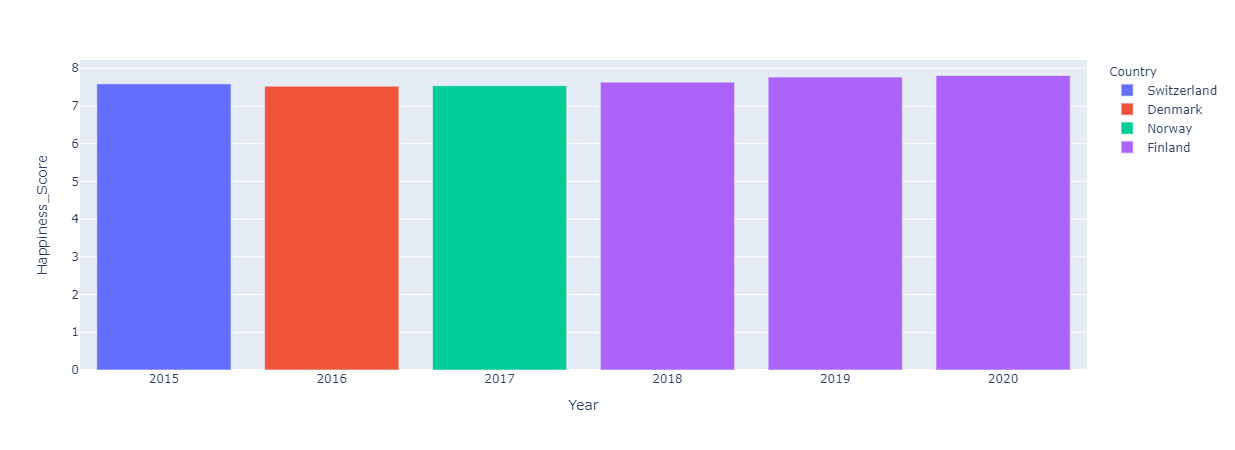

<Figure size 432x216 with 0 Axes>

In [358]:
most_hap = pd.DataFrame()
for year in gdp_5['Year'].unique():
     most_hap=most_hap.append(gdp_5[( gdp_5['Year'] ==year)].iloc[0])
            
plt.figure(figsize=(6, 3))  
fig = px.bar(data_frame=most_hap, 
             x='Year', y=most_hap['Happiness_Score'], color = 'Country')
fig.show()

Switzerland,Denmark,Norway was most happy countries by years but at 2020 Finland is best about it.

**Effect of freedom to happines score of countries by years**

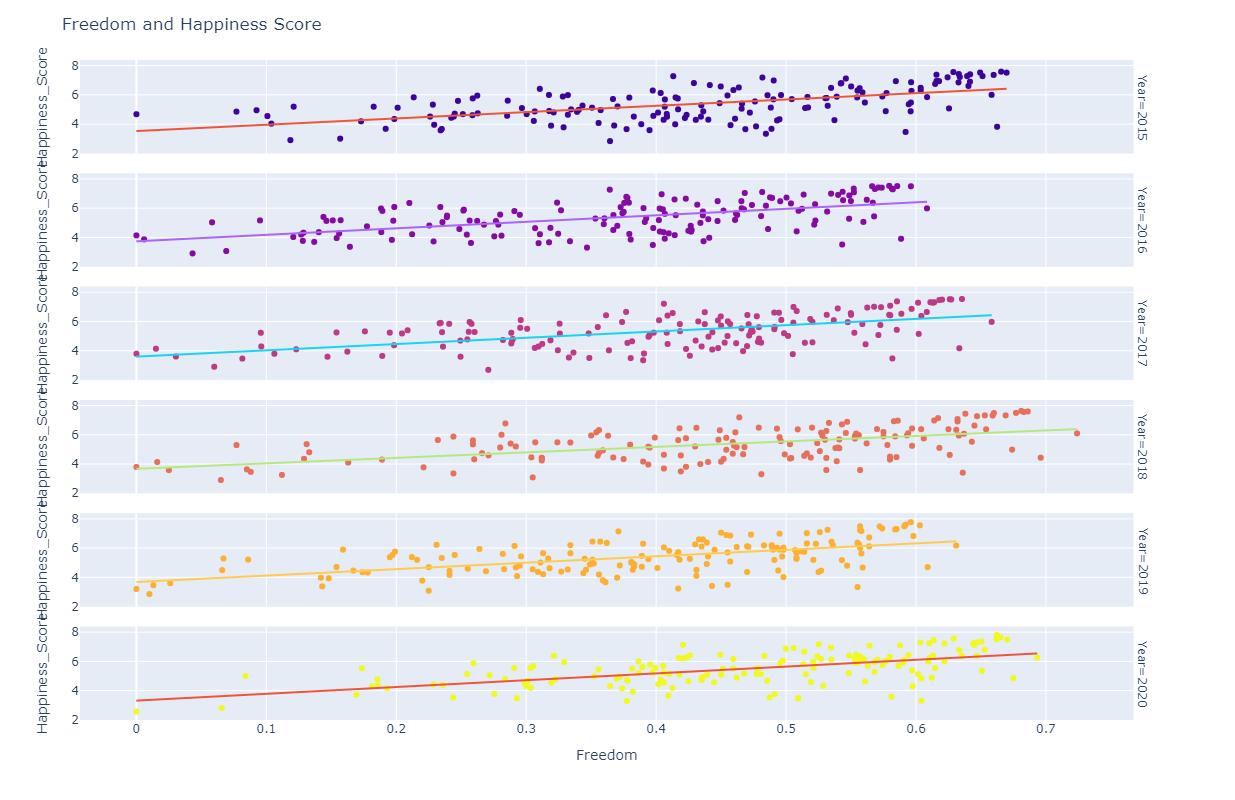

In [51]:
fig = px.scatter(hp, x="Freedom", 
                 y="Happiness_Score",
                 facet_row="Year",
                color="Year",
                trendline= "ols")
fig.update(layout_coloraxis_showscale=False)
fig.update_traces(textposition='top center')
fig.update_layout(
    height=800,
    title_text='Freedom and Happiness Score'
)
fig.show()

Picture above confirms that, Freedom to Life Choise and Happiness score depicts linear relation with positive correlation by years. Increase in Freedom to Life Choise leads happines score upward.

**Generosity ratio of happy countries 2020**

made categorized happiness score and generosity 

In [36]:
def make_discrete_gen(Generosity):
    if Generosity >= 0.2:
        return 'Generous'

    else:
        return 'NotGenerous'

In [37]:
def make_discrete(Happines_Score):
    if Happines_Score >= 5:
        return 'Happy'

    else:
        return 'Unhappy'

In [38]:
hp['Is_Happy'] = hp['Happiness_Score'].apply(make_discrete)

In [39]:
hp['Is_Generous'] = hp['Generosity'].apply(make_discrete_gen)

In [40]:
happy_generous_count=hp[(hp['Is_Happy'] == 'Happy') & (hp.Year== 2020) & (hp['Is_Generous']=='Generous')]
count=hp[(hp.Year==2020)]
print(len(happy_generous_count.index)/len(count.index)*100)

24.18300653594771


24% of happy countries is generous in 2020

In [42]:
hp

,Country,Happiness_Score,GDP_per_capita,Health_(Life_Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Is_Happy,Is_Generous
0,Switzerland,7.5870,1.396510,0.941430,0.665570,0.308260,0.296780,2.517380,2015,Happy,Generous
1,Iceland,7.5610,1.302320,0.947840,0.628770,0.141450,0.436300,2.702010,2015,Happy,Generous
2,Denmark,7.5270,1.325480,0.874640,0.649380,0.308260,0.341390,2.492040,2015,Happy,Generous
3,Norway,7.5220,1.459000,0.885210,0.669730,0.308260,0.346990,2.465310,2015,Happy,Generous
4,Canada,7.4270,1.326290,0.905630,0.632970,0.308260,0.458110,2.451760,2015,Happy,Generous
...,...,...,...,...,...,...,...,...,...,...,...
930,Central African Republic,3.4759,0.041072,0.000000,0.292814,0.028265,0.253513,2.731170,2020,Unhappy,Generous
931,Rwanda,3.3123,0.343243,0.572383,0.604088,0.308260,0.235705,1.418050,2020,Unhappy,Generous
932,Zimbabwe,3.2992,0.425564,0.375038,0.377405,0.080929,0.151349,1.418050,2020,Unhappy,NotGenerous
933,South Sudan,2.8166,0.289083,0.208809,0.065609,0.111157,0.209935,1.418050,2020,Unhappy,Generous


**Global Happiness ratio**

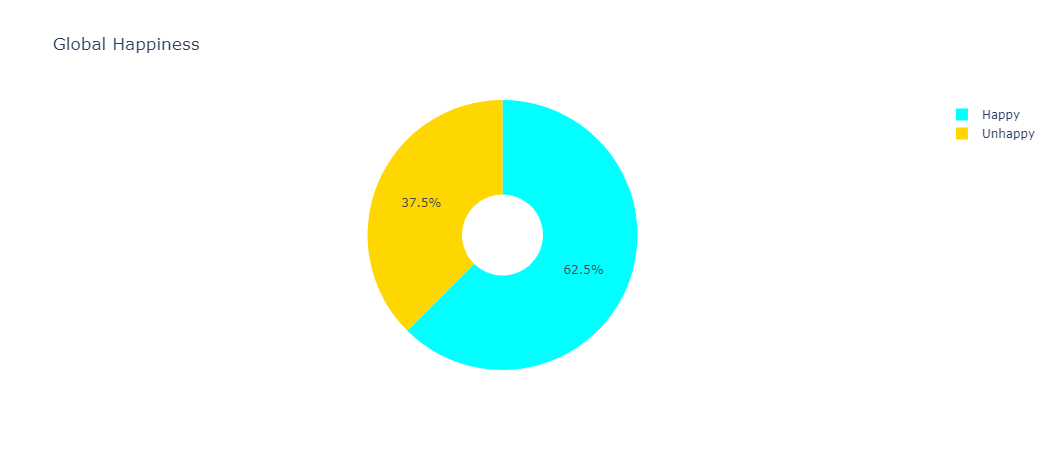

In [45]:
hp_ = hp['Is_Happy'].value_counts()

label_hp_ = hp_.index
size_hp_ = hp_.values


colors = ['aqua', 'gold', 'yellow', 'crimson', 'magenta']

trace = go.Pie(
         labels = label_hp_, values = size_hp_, marker = dict(colors = colors), hole = 0.3)

data = [trace]

layout1 = go.Layout(
           title = 'Global Happiness')

fig = go.Figure(data = data, layout = layout1)
py.iplot(fig)

**Health and Gdp per capita in 2020**

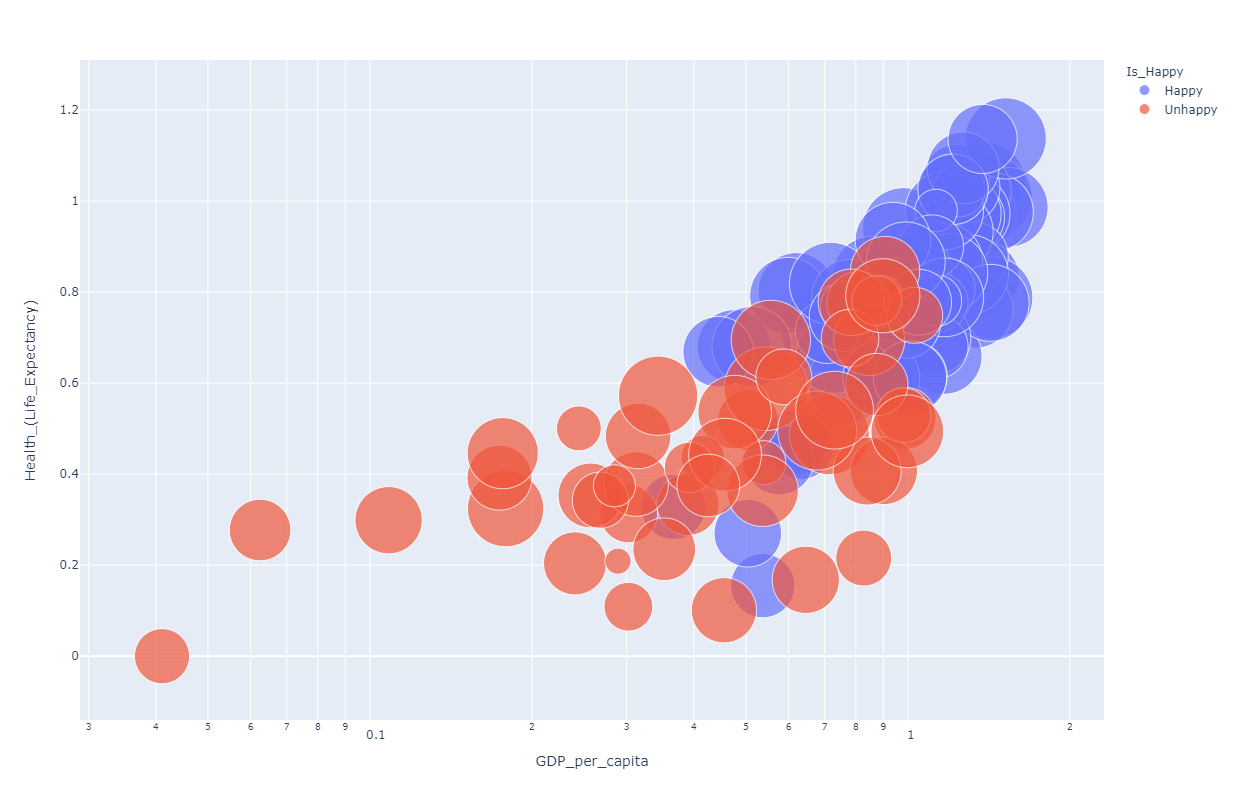

In [46]:
year20=hp[hp['Year']==2020]

fig = px.scatter(year20, x="GDP_per_capita", y="Health_(Life_Expectancy)",
	         size="Freedom",color="Is_Happy",height=800,
                 hover_name='Country', log_x=True, size_max=60)
fig.show()

GDP per capita and health are more positivly correlated each other in happy countries.

**Which countries is most generous?**

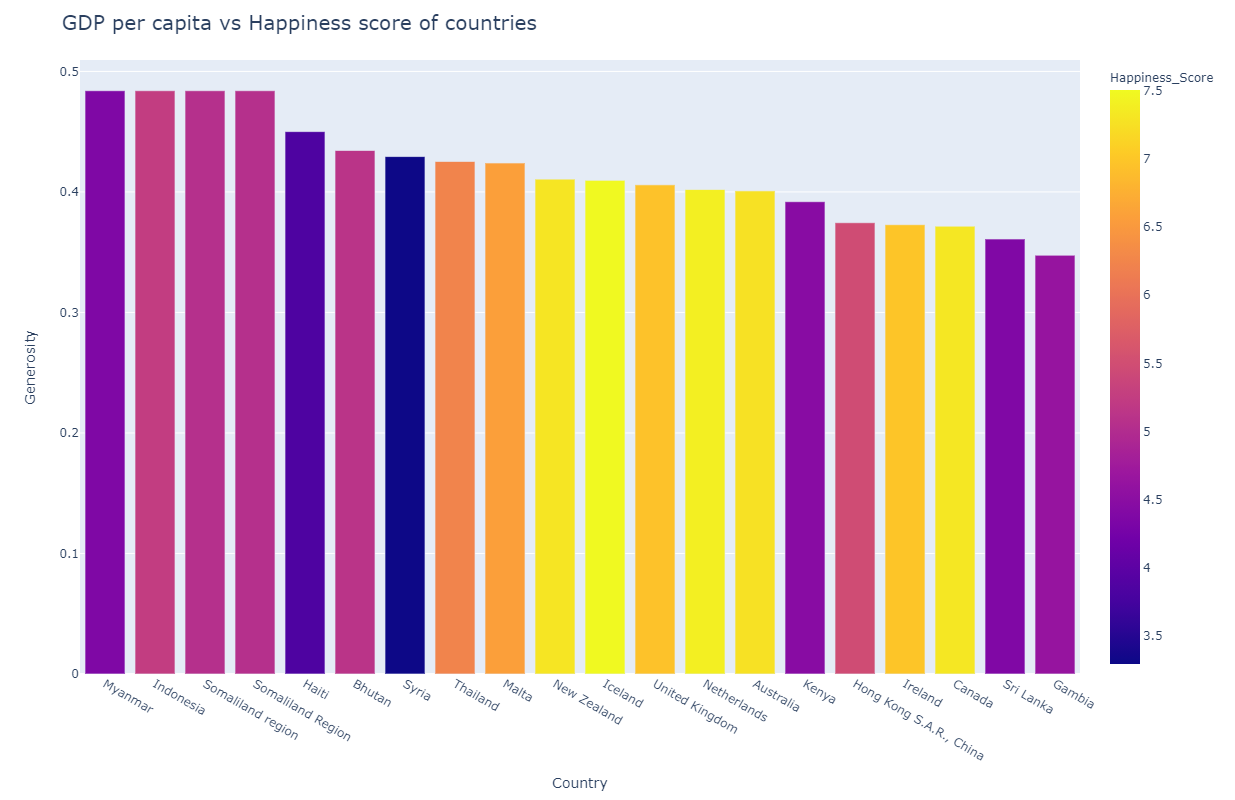

<Figure size 288x288 with 0 Axes>

In [154]:
gen_group_20=country_group.sort_values(by=["Generosity"], ascending=False).head(20)

plt.figure(figsize=(4, 4))
fig = px.bar(gen_group_20, x=gen_group_20.index, y='Generosity',color='Happiness_Score',height=800)
fig.update_layout(title='GDP per capita vs Happiness score of countries',titlefont_size=20)
fig.show();

Although myanmar is the most generous country, it is not one of the happy country

happiness do not make people generous

In [147]:
country_group['rank']=np.arange(1,len(country_group)+1)
country_group

,Happiness_Score,GDP_per_capita,Health_(Life_Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,rank
Country,,,,,,,,,
Finland,7.582950,1.344999,0.888408,0.628333,0.308260,0.208097,2.439728,2017.5,1
Denmark,7.562600,1.385099,0.884263,0.632473,0.308260,0.306196,2.349326,2017.5,2
Norway,7.532167,1.503518,0.895790,0.643407,0.308260,0.322156,2.283592,2017.5,3
Switzerland,7.519483,1.458599,0.947021,0.622028,0.308260,0.276036,2.327548,2017.5,4
Iceland,7.509917,1.376519,0.931594,0.625359,0.140878,0.409658,2.390480,2017.5,5
...,...,...,...,...,...,...,...,...,...
Afghanistan,3.355150,0.347712,0.256598,0.098270,0.048616,0.245648,1.980336,2017.5,168
Syria,3.292200,0.699109,0.566281,0.081700,0.159547,0.429352,1.676089,2017.0,169
South Sudan,3.269320,0.344654,0.200421,0.106258,0.111020,0.236119,1.986641,2018.0,170


**Country rank about Happiness**

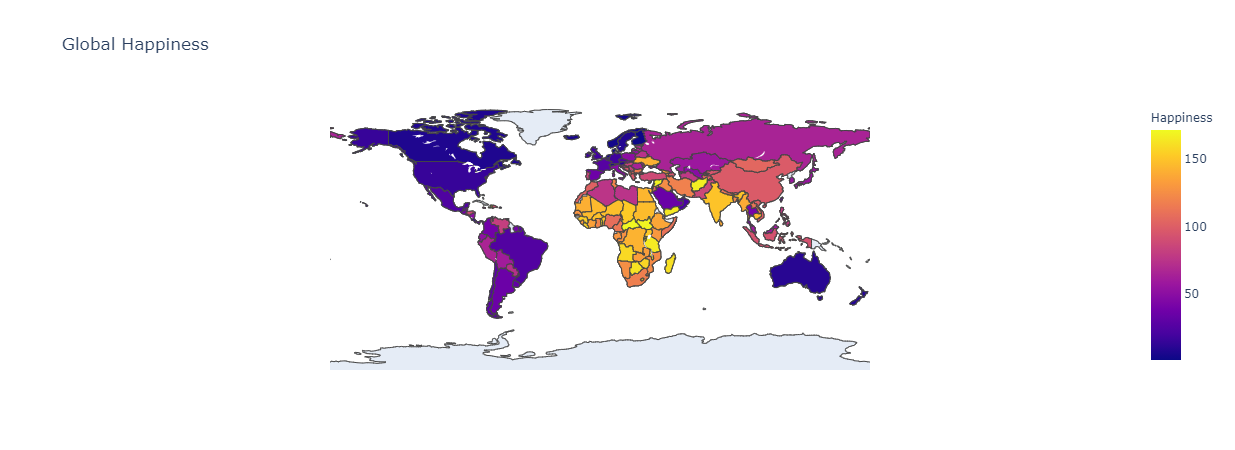

In [150]:
data = dict(type = 'choropleth', 
           locations = country_group.index,
           locationmode = 'country names',
           z =country_group['rank'], 
           text = country_group.index,
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Global Happiness', 
             geo = dict(showframe = False, 
                       projection = {'type': 'equirectangular'}))
choromap3 = go.Figure(data = [data], layout=layout)
py.iplot(choromap3)

**Happiness Score in World**

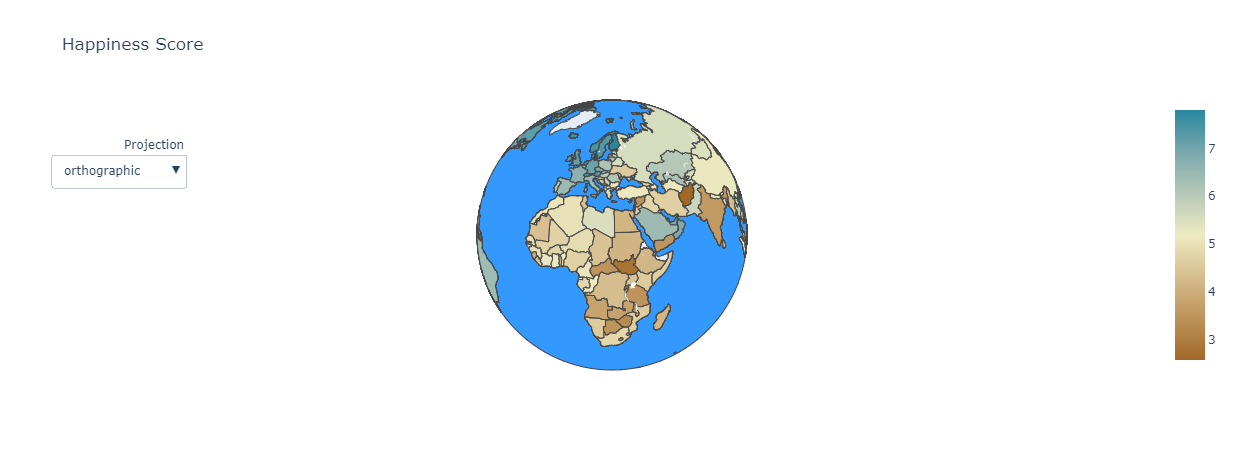

In [155]:

trace1 = [go.Choropleth(
               colorscale = 'Earth',
               locationmode = 'country names',
               locations = hp['Country'],
               text = hp['Country'], 
               z = hp['Happiness_Score'],
               )]

layout = dict(title = 'Happiness Score',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))


projections = [ "orthographic","equirectangular"]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])


# Update Layout Object

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)



In [64]:
import eli5
from eli5.sklearn import PermutationImportance
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(n_estimators=5000)
indData = hp.loc[:,"GDP_per_capita":"Year"]
depData = hp.pop("Happiness_Score")
lgbm.fit(indData, depData)
columns = indData.columns.to_list()
perm = PermutationImportance(lgbm, random_state=10).fit(indData, depData)
eli5.show_weights(perm, feature_names = columns)

Weight,Feature
0.4994 ± 0.0165,GDP_per_capita
0.2383 ± 0.0053,Health_(Life_Expectancy)
0.2150 ± 0.0172,Dystopia Residual
0.1479 ± 0.0129,Freedom
0.0459 ± 0.0028,Generosity
0.0378 ± 0.0026,Trust (Government Corruption)
0.0168 ± 0.0011,Year


**Conclusion**

*GDP per capita is having highest impact on Happiness Score

*Healthy life expectancy is second in the list to impact happiness.

*Perception of Goverment Corruption is having least impact on Happiness Score.

*Afghanistan,Syria,South Sudan,Central African Republic,Burundi are most unhappy countries

*Finland is most happy country last 3 years.

*Africa region is most unhappy region